In [11]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick

In [12]:
df1 = pd.read_csv('loggging_call_function2.csv')
df2 = pd.read_csv('loggging_call_function3.csv')
df3 = pd.read_csv('loggging_call_function_analysis.csv')
df = pd.concat([df1, df2, df3], ignore_index=True)
df

,library,function,line,file
0,alpacka.metric_logging.log_scalar,metric_logging.log_scalar,85,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...
1,alpacka.metric_logging.log_scalar,metric_logging.log_scalar,72,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...
2,alpacka.metric_logging.log_scalar,metric_logging.log_scalar,81,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...
3,tensorflow.config.threading.set_inter_op_paral...,tf.config.threading.set_inter_op_parallelism_t...,55,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...
4,tensorflow.config.threading.set_intra_op_paral...,tf.config.threading.set_intra_op_parallelism_t...,56,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...
...,...,...,...,...
966682,tensorflow_data_validation.get_feature,tfdv.get_feature,61,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...
966683,tensorflow_data_validation.validate_statistics,tfdv.validate_statistics,64,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...
966684,tensorflow_data_validation.display_anomalies,tfdv.display_anomalies,68,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...
966685,tensorflow.python.lib.io.file_io.recursive_cre...,file_io.recursive_create_dir,72,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...


In [13]:
df = df.drop_duplicates(ignore_index=True)

In [14]:
def annotate_logging_statements(file_df):
    # Define keywords for each type of logging statement
    python_keywords = ['.info', '.warn', '.error', '.debug', '.exception', '.critical', '.fatal', '.warning', 'logging']
    ml_keywords = {'wandb': 'Weights & Biases', 
                   'mlflow': 'MLflow', 
                   'metric_logging': 'TensorBoard',
                   'tensorboard': 'TensorBoard',  
                   'neptune': 'Neptune',
                   'comet_ml': 'Comet',
                   'whylogs': 'Whylogs',
                   'dowel': 'Dowel',
                   'sacred': 'Sacred',
                   'ml_logger': 'ML_logger',
                   'dowel': 'Dowel'}
    
    # Create a new column to store the type of each logging statement
    file_df['logging_library'] = ''
    
    # Loop through each row in the DataFrame and annotate each logging statement
    for i, row in file_df.iterrows():
        statement = row['library']
        
        # Check if the statement contains any of the Python logging keywords at the end of the string
        if any(statement.endswith(keyword) for keyword in python_keywords) or any(statement.startswith(keyword) for keyword in python_keywords):
            file_df.at[i, 'logging_library'] = 'Python logging'
        # Check if the statement contains any of the machine learning logging keywords
        elif any(keyword in statement for keyword in ml_keywords.keys()):
            # Get the keyword that is present in the statement
            keyword = next((kw for kw in ml_keywords.keys() if kw in statement), None)
            # Annotate the statement with the corresponding library name
            file_df.at[i, 'logging_library'] = f"{ml_keywords[keyword]}" if keyword else 'Unknown'
        # If the statement doesn't contain any known keywords, label it as unknown
        else:
            file_df.at[i, 'logging_library'] = 'Unknown'
    
    return file_df


In [15]:
annotate_logging_statements(df)

C:\Users\fpatr\AppData\Local\Temp\ipykernel_4320\2109310480.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_df['logging_library'] = ''


,library,function,line,file,logging_library
0,alpacka.metric_logging.log_scalar,metric_logging.log_scalar,85,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,TensorBoard
1,alpacka.metric_logging.log_scalar,metric_logging.log_scalar,72,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,TensorBoard
2,alpacka.metric_logging.log_scalar,metric_logging.log_scalar,81,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,TensorBoard
3,tensorflow.config.threading.set_inter_op_paral...,tf.config.threading.set_inter_op_parallelism_t...,55,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,Unknown
4,tensorflow.config.threading.set_intra_op_paral...,tf.config.threading.set_intra_op_parallelism_t...,56,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,Unknown
...,...,...,...,...,...
785017,tensorflow_data_validation.get_feature,tfdv.get_feature,61,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,Unknown
785018,tensorflow_data_validation.validate_statistics,tfdv.validate_statistics,64,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,Unknown
785019,tensorflow_data_validation.display_anomalies,tfdv.display_anomalies,68,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,Unknown
785020,tensorflow.python.lib.io.file_io.recursive_cre...,file_io.recursive_create_dir,72,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,Unknown


In [16]:
# Dropping Unknown row in logging_type
df = df[df["logging_library"].str.contains("Unknown") == False]

In [17]:
df

,library,function,line,file,logging_library
0,alpacka.metric_logging.log_scalar,metric_logging.log_scalar,85,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,TensorBoard
1,alpacka.metric_logging.log_scalar,metric_logging.log_scalar,72,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,TensorBoard
2,alpacka.metric_logging.log_scalar,metric_logging.log_scalar,81,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,TensorBoard
45,alpacka.metric_logging.log_property,metric_logging.log_property,167,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,TensorBoard
46,alpacka.metric_logging.log_scalar_metrics,metric_logging.log_scalar_metrics,183,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,TensorBoard
...,...,...,...,...,...
784714,sacred.Ingredient,Ingredient,136,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,Sacred
784715,sacred.Ingredient,Ingredient,143,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,Sacred
784716,sacred.Ingredient,Ingredient,151,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,Sacred
784717,sacred.Experiment,Experiment,165,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,Sacred


In [18]:
def annotate_logging_type(df):
    # Create a new column to store the logging type
    df['logging_type'] = ''
    
    # Loop through each row in the DataFrame and annotate the logging type
    for i, row in df.iterrows():
        if row['logging_library'] == 'Python logging':
            df.at[i, 'logging_type'] = 'GENERAL'
        else:
            df.at[i, 'logging_type'] = 'ML'
    
    return df

In [19]:
df = annotate_logging_type(df)
df

C:\Users\fpatr\AppData\Local\Temp\ipykernel_4320\2697657365.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['logging_type'] = ''


,library,function,line,file,logging_library,logging_type
0,alpacka.metric_logging.log_scalar,metric_logging.log_scalar,85,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,TensorBoard,ML
1,alpacka.metric_logging.log_scalar,metric_logging.log_scalar,72,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,TensorBoard,ML
2,alpacka.metric_logging.log_scalar,metric_logging.log_scalar,81,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,TensorBoard,ML
45,alpacka.metric_logging.log_property,metric_logging.log_property,167,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,TensorBoard,ML
46,alpacka.metric_logging.log_scalar_metrics,metric_logging.log_scalar_metrics,183,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,TensorBoard,ML
...,...,...,...,...,...,...
784714,sacred.Ingredient,Ingredient,136,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,Sacred,ML
784715,sacred.Ingredient,Ingredient,143,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,Sacred,ML
784716,sacred.Ingredient,Ingredient,151,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,Sacred,ML
784717,sacred.Experiment,Experiment,165,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,Sacred,ML


In [20]:
def plot_logging_type_barplot(df, filename):
    # Filter the dataframe to include only ML and GENERAL logging types
#     filtered_df = df[df['logging_type'].isin(['ML', 'GENERAL'])]
    
    # Count the number of occurrences of each logging type
    counts = df['logging_type'].value_counts(normalize=True)
    
    sns.set_style('whitegrid')
    sns.set_context('paper')
    
    # Plot a barplot of the logging type values
    fig, ax = plt.subplots(figsize=(5, 5))
    sns.barplot(x=counts.index, y=counts.values, palette='Set2')
    
    # Add percentages on top of each bar
    for i, v in enumerate(counts.values):
        ax.text(i, v+0.01, f"{v*100:.1f}%", ha='center', fontsize=14)
    
    # Set plot labels and title
    ax.set_xlabel('Logging Type', fontsize=14)
    ax.set_ylabel('Percentage of logging', fontsize=14)
    ax.set_ylim([0, 0.58])
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
    ax.tick_params(axis='both', labelsize=14)
#     ax.set_title('Barplot of Logging Types')
    
    # Save the plot as a PDF file with high resolution
    plt.savefig(filename, dpi=500, bbox_inches='tight')

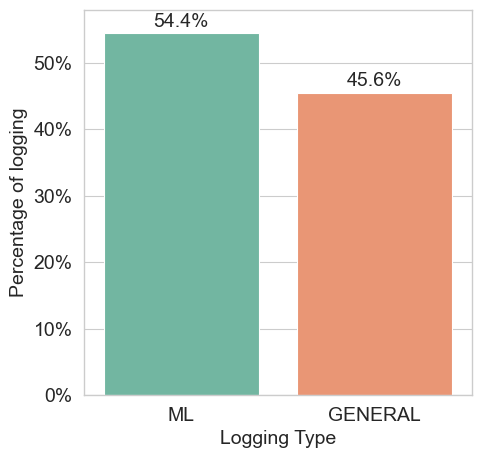

In [21]:
plot_logging_type_barplot(df, "logging_distibution_update.pdf")

In [22]:
def extract_repository_name(df):
    df['repository_name'] = df['file'].str.split('clones').str[1].str.split('\\').str[1]
    return df

In [23]:
df = extract_repository_name(df)
df

C:\Users\fpatr\AppData\Local\Temp\ipykernel_4320\1915226563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['repository_name'] = df['file'].str.split('clones').str[1].str.split('\\').str[1]


,library,function,line,file,logging_library,logging_type,repository_name
0,alpacka.metric_logging.log_scalar,metric_logging.log_scalar,85,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,TensorBoard,ML,AdaptiveSubgoalSearch
1,alpacka.metric_logging.log_scalar,metric_logging.log_scalar,72,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,TensorBoard,ML,AdaptiveSubgoalSearch
2,alpacka.metric_logging.log_scalar,metric_logging.log_scalar,81,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,TensorBoard,ML,AdaptiveSubgoalSearch
45,alpacka.metric_logging.log_property,metric_logging.log_property,167,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,TensorBoard,ML,AdaptiveSubgoalSearch
46,alpacka.metric_logging.log_scalar_metrics,metric_logging.log_scalar_metrics,183,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,TensorBoard,ML,AdaptiveSubgoalSearch
...,...,...,...,...,...,...,...
784714,sacred.Ingredient,Ingredient,136,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,Sacred,ML,zzsza
784715,sacred.Ingredient,Ingredient,143,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,Sacred,ML,zzsza
784716,sacred.Ingredient,Ingredient,151,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,Sacred,ML,zzsza
784717,sacred.Experiment,Experiment,165,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,Sacred,ML,zzsza


In [24]:
df["repository_name"][0]

'AdaptiveSubgoalSearch'

In [25]:
def plot_repository_counts(df):
    # Extract the relevant columns
    data = df[['logging_type', 'repository_name']].copy()

    # Remove duplicates
    data.drop_duplicates(inplace=True)

    # Filter the data to include only ML and GENERAL logging types
    data = data[data['logging_type'].isin(['ML', 'GENERAL'])]
    

    # Calculate the count of repositories for each logging type
    counts = data['logging_type'].value_counts().reset_index().rename(columns={'index': 'logging_type', 'logging_type': 'count'})
    # Set the style and context for the plot
    sns.set_style('whitegrid')
    sns.set_context('paper', font_scale=1.5)

    # Calculate the number of repositories to select from each logging type
    total_repositories = 502
    ml_count = int(total_repositories * (counts[counts['logging_type'] == 'ML']['count'].values[0] / counts['count'].sum()))
    general_count = total_repositories - ml_count

    # Sample the repositories proportionally from each logging type
    ml_repositories = data[data['logging_type'] == 'ML'].sample(ml_count, replace=False)
    general_repositories = data[data['logging_type'] == 'GENERAL'].sample(general_count, replace=False)

    # Combine the sampled repositories
    sampled_data = pd.concat([ml_repositories, general_repositories])

    # Assign a new logging type 'Both' to repositories associated with both ML and GENERAL
    sampled_data['logging_type'] = sampled_data['logging_type'].apply(lambda x: 'ML + GENERAL' if x == 'ML' and 'GENERAL' in sampled_data['logging_type'].values else x)

    # Count the number of repositories for each logging type
    counts = sampled_data['logging_type'].value_counts().reset_index().rename(columns={'index': 'logging_type', 'logging_type': 'count'})

    # Plot the repository counts using barplot
    plt.figure(figsize=(5, 5))
    ax = sns.barplot(data=counts, x='logging_type', y='count', palette='Set2')

    # Add the number of repositories on top of each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    plt.xlabel('Logging Type')
    plt.ylabel('Number of Repositories')

    # Adjust the graduation on different axes
    ax.tick_params(axis='x', labelrotation=45)
    plt.xticks(rotation=45)
#     plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

    # Save the figure as a PDF with white grid lines
    plt.savefig('repository_counts.pdf', format='pdf', dpi=300, bbox_inches='tight', facecolor='white', edgecolor='white', transparent=True)

    plt.show()

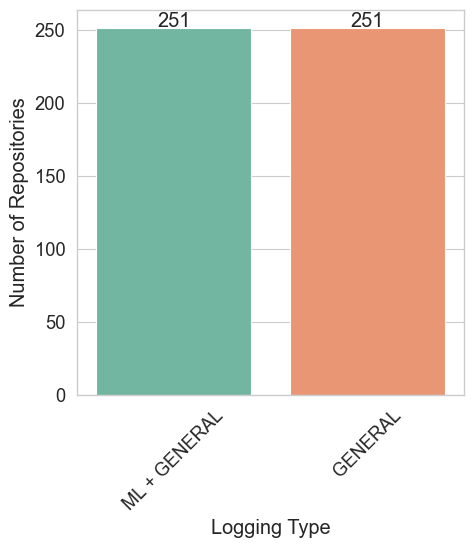

In [26]:
plot_repository_counts(df)

In [27]:
df['logging_library'].unique()

array(['TensorBoard', 'Neptune', 'Python logging', 'Weights & Biases',
       'Comet', 'MLflow', 'Dowel', 'Sacred', 'Whylogs', 'ML_logger'],
      dtype=object)

In [28]:
df_general = df[df["logging_type"].str.contains("GENERAL")]
df_general

,library,function,line,file,logging_library,logging_type,repository_name
227,logging.getLogger,logging.getLogger,179,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,Python logging,GENERAL,AdaptiveSubgoalSearch
228,logging.StreamHandler,logging.StreamHandler,185,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,Python logging,GENERAL,AdaptiveSubgoalSearch
354,logging.getLogger,logging.getLogger,9,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,Python logging,GENERAL,AdaptiveSubgoalSearch
370,logging.basicConfig,logging.basicConfig,30,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,Python logging,GENERAL,AdaptiveSubgoalSearch
371,logging.getLogger,logging.getLogger,36,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,Python logging,GENERAL,AdaptiveSubgoalSearch
...,...,...,...,...,...,...,...
784695,logging.StreamHandler,logging.StreamHandler,8,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,Python logging,GENERAL,zzsza
784696,logging.Formatter,logging.Formatter,9,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,Python logging,GENERAL,zzsza
784710,logging.getLogger,logging.getLogger,81,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,Python logging,GENERAL,zzsza
784711,logging.StreamHandler,logging.StreamHandler,83,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,Python logging,GENERAL,zzsza


In [29]:
log_level_keywords = {'.info': 'INFO', 
                   '.warn': 'WARNING', 
                   '.error': 'ERROR',  
                   '.debug': 'DEBUG',
                   '.exception': 'EXCEPTION',
                   '.critical': 'CRITICAL',
                   '.fatal': 'FATAL',
                   '.warning': 'WARNING'}

In [30]:
def annotate_logging_level(df, log_level_keywords):
    # Create a new column to store the logging info
    df['logging_level'] = ''
    
    # Loop through each row in the DataFrame and annotate the logging info
    for i, row in df.iterrows():
        for keyword, info in log_level_keywords.items():
            if row['library'].endswith(keyword):
                df.at[i, 'logging_level'] = info
                break
    
    return df

In [31]:
df_general=annotate_logging_level(df_general, log_level_keywords)
df_general

C:\Users\fpatr\AppData\Local\Temp\ipykernel_4320\3359544019.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['logging_level'] = ''


,library,function,line,file,logging_library,logging_type,repository_name,logging_level
227,logging.getLogger,logging.getLogger,179,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,Python logging,GENERAL,AdaptiveSubgoalSearch,
228,logging.StreamHandler,logging.StreamHandler,185,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,Python logging,GENERAL,AdaptiveSubgoalSearch,
354,logging.getLogger,logging.getLogger,9,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,Python logging,GENERAL,AdaptiveSubgoalSearch,
370,logging.basicConfig,logging.basicConfig,30,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,Python logging,GENERAL,AdaptiveSubgoalSearch,
371,logging.getLogger,logging.getLogger,36,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,Python logging,GENERAL,AdaptiveSubgoalSearch,
...,...,...,...,...,...,...,...,...
784695,logging.StreamHandler,logging.StreamHandler,8,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,Python logging,GENERAL,zzsza,
784696,logging.Formatter,logging.Formatter,9,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,Python logging,GENERAL,zzsza,
784710,logging.getLogger,logging.getLogger,81,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,Python logging,GENERAL,zzsza,
784711,logging.StreamHandler,logging.StreamHandler,83,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,Python logging,GENERAL,zzsza,


In [32]:
def plot_logging_type_barplot(df, filename):
    # Filter the dataframe to include only ML and GENERAL logging types
    filtered_df = df[df['logging_level'].isin(['INFO', 'WARNING', 'ERROR', 'DEBUG', 'EXCEPTION', 'CRITICAL', 'FATAL', 'WARNING'])]
    
    # Count the number of occurrences of each logging type
    counts = filtered_df['logging_level'].value_counts(normalize=True)
    
    # Plot a barplot of the logging type values
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.barplot(x=counts.index, y=counts.values, palette='Set2')
    
    # Add percentages on top of each bar
    for i, v in enumerate(counts.values):
        ax.text(i, v+0.01, f"{v*100:.1f}%", ha='center', fontsize=14)
    
    # Set plot labels and title
    ax.set_xlabel('Logging Level', fontsize=14)
    ax.set_ylabel('Percentage of logging statement', fontsize=14)
    ax.set_ylim([0, 0.68])
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
    ax.tick_params(axis='both', labelsize=14)
#     ax.set_title('Barplot of Logging Types')
     # Rotate x-axis labels
    plt.xticks(rotation=40)
    
    # Save the plot as a PDF file with high resolution
    plt.savefig(filename, dpi=500, bbox_inches='tight')

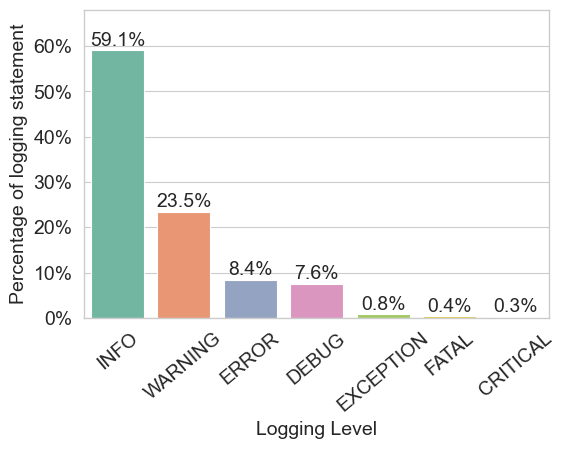

In [33]:
plot_logging_type_barplot(df_general, "logging_level_distibution.pdf")

In [34]:
df_ML = df[df["logging_type"].str.contains("ML")]
df_ML

,library,function,line,file,logging_library,logging_type,repository_name
0,alpacka.metric_logging.log_scalar,metric_logging.log_scalar,85,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,TensorBoard,ML,AdaptiveSubgoalSearch
1,alpacka.metric_logging.log_scalar,metric_logging.log_scalar,72,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,TensorBoard,ML,AdaptiveSubgoalSearch
2,alpacka.metric_logging.log_scalar,metric_logging.log_scalar,81,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,TensorBoard,ML,AdaptiveSubgoalSearch
45,alpacka.metric_logging.log_property,metric_logging.log_property,167,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,TensorBoard,ML,AdaptiveSubgoalSearch
46,alpacka.metric_logging.log_scalar_metrics,metric_logging.log_scalar_metrics,183,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,TensorBoard,ML,AdaptiveSubgoalSearch
...,...,...,...,...,...,...,...
784714,sacred.Ingredient,Ingredient,136,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,Sacred,ML,zzsza
784715,sacred.Ingredient,Ingredient,143,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,Sacred,ML,zzsza
784716,sacred.Ingredient,Ingredient,151,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,Sacred,ML,zzsza
784717,sacred.Experiment,Experiment,165,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,Sacred,ML,zzsza


In [35]:
# def plot_logging_type_barplot(df, filename):
#     # Filter the dataframe to include only ML and GENERAL logging types
# #     filtered_df = df[df['logging_level'].isin(['INFO', 'WARNING', 'ERROR', 'DEBUG', 'EXCEPTION', 'CRITICAL', 'FATAL', 'WARNING'])]
    
#     # Count the number of occurrences of each logging type
#     counts = df['logging_library'].value_counts(normalize=True)
    
#     # Plot a barplot of the logging type values
#     fig, ax = plt.subplots(figsize=(8, 6))
#     sns.barplot(x=counts.index, y=counts.values, palette='Set2')
    
#     # Add percentages on top of each bar
#     for i, v in enumerate(counts.values):
#         ax.text(i, v+0.01, f"{v*100:.1f}%", ha='center')
    
#     # Set plot labels and title
#     ax.set_xlabel('ML logging libraries')
#     ax.set_ylabel('Percentage')
#     # Rotate x-axis labels
#     plt.xticks(rotation=90)
# #     ax.set_title('Barplot of Logging Types')
    
#     # Save the plot as a PDF file with high resolution
#     plt.savefig(filename, dpi=500, bbox_inches='tight')

In [36]:
def plot_logging_type_barplot(df, filename):
    # Count the number of occurrences of each logging type
    counts = df['logging_library'].value_counts(normalize=True)
    
    # Plot a barplot of the logging type values
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.barplot(x=counts.index, y=counts.values, palette='Set2')
    
    # Add percentages on top of each bar
    for i, v in enumerate(counts.values):
        ax.text(i, v+0.01, f"{v*100:.1f}%", ha='center', fontsize=14)
    
    # Set plot labels and title
    ax.set_xlabel('ML logging libraries', fontsize=14)
    ax.set_ylabel('Percentage of logging statement', fontsize=14)
    ax.set_ylim([0, 0.48])
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
    # Increase font size of tick labels
    ax.tick_params(axis='both', labelsize=14)
    
    # Rotate x-axis labels
    plt.xticks(rotation=90)
    
    # Save the plot as a PDF file with high resolution
    plt.savefig(filename, dpi=500, bbox_inches='tight')


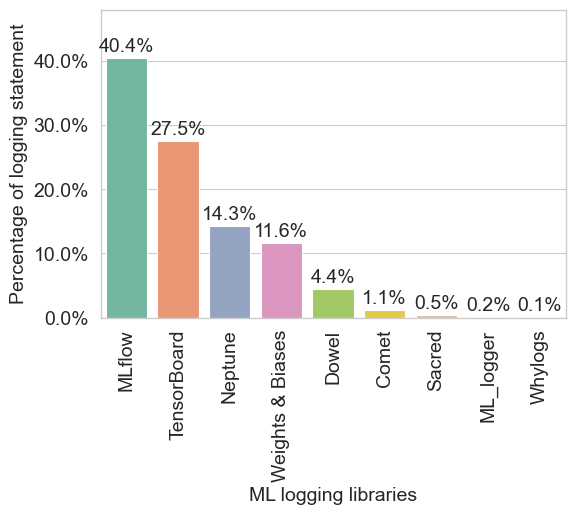

In [37]:
plot_logging_type_barplot(df_ML, "ML_logging_most_used.pdf")

In [82]:
df_size = pd.read_csv('project_size_final.csv')
df_size

,project,lines_of_code
0,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,26848
1,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,1101
2,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,5662
3,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,7749
4,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,208
...,...,...
497,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,435
498,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,26573
499,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,17493
500,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,101675


In [83]:
df_size.loc['Total'] = pd.Series(df_size['lines_of_code'].sum(), index = ['lines_of_code'])

In [84]:
df_size

,project,lines_of_code
0,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,26848.0
1,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,1101.0
2,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,5662.0
3,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,7749.0
4,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,208.0
...,...,...
498,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,26573.0
499,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,17493.0
500,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,101675.0
501,C:\Users\fpatr\PycharmProjects\ML-Logging./dat...,280688.0


In [41]:
d = {'paper': ['This paper (ML)','Zeng et al. (Android)','Alves et al. (Python)', 'Zhu et al. (C#)', 'Chen et al. (JAVA)', 'Yuan et al. (C/C++)'], 'Logging_density': [1150, 479, 128, 59, 51, 30]}
df_density = pd.DataFrame(data=d)
df_density

,paper,Logging_density
0,This paper (ML),1150
1,Zeng et al. (Android),479
2,Alves et al. (Python),128
3,Zhu et al. (C#),59
4,Chen et al. (JAVA),51
5,Yuan et al. (C/C++),30


In [42]:
# def plot_logging_density_barplot(df, filename):
#     fig, ax = plt.subplots(figsize=(4, 4))
    
#     # Create the barplot
#     sns.barplot(data=df, x='paper', y='Logging_density', palette='Set2')
    
#     # Add the counts on top of the bars
#     for index, row in df.iterrows():
#         ax.text(index, row['Logging_density'], str(row['Logging_density']), 
#                 ha='center', va='bottom', fontsize=14)
    
#     # Set the axis labels and title
#     ax.set_xlabel('Paper', fontsize=14)
#     ax.set_ylabel('Logging Density', fontsize=14)
#     plt.xticks(rotation=45, ha='right')
# #     ax.set_title('Comparison of Logging Density in Different Papers', fontsize=16)
    
#     # Increase font size of tick labels
#     ax.tick_params(axis='both', labelsize=14)
    
#     # Save the plot as a high-quality image
#     plt.savefig(filename, dpi=500, bbox_inches='tight')

In [43]:
def plot_logging_density_barplot(df, filename):
    fig, ax = plt.subplots(figsize=(6, 2))
    
    # Create the barplot
    sns.barplot(data=df, x='Logging_density', y='paper', palette='Set2')
    
    # Add the counts on top of the bars
    for index, row in df.iterrows():
        ax.text(row['Logging_density'], index, str(row['Logging_density']), 
                ha='left', va='center', fontsize=14)
    
    # Set the axis labels and title
    ax.set_xlabel('Logging Density (logging statement per LoC)', fontsize=12)
    ax.set_ylabel('Paper', fontsize=14)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    # Increase font size of tick labels
    ax.tick_params(axis='both', labelsize=14)
#     ax.set_title('Comparison of Logging Density in Different Papers', fontsize=16)
    
    # Save the plot as a high-quality image
    plt.savefig(filename, dpi=300, bbox_inches='tight')


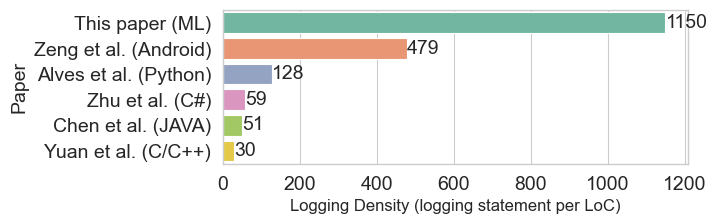

In [44]:
plot_logging_density_barplot(df_density, "logging_density_plot.pdf")

In [270]:
d = {'ML phases': ['Model \n Training','Non-ML \n Pipeline', 'Data \n processing', 'Data \n Loading', 'Model \n Evaluation', 'Unclassied', 'Model \n Deployment'], 'Percentage': [35.83, 19.51, 15.84, 14.47, 6.20, 4.50, 3.66]}
df_pipeline = pd.DataFrame(data=d)
df_pipeline

,ML phases,Percentage
0,Model \n Training,35.83
1,Non-ML \n Pipeline,19.51
2,Data \n processing,15.84
3,Data \n Loading,14.47
4,Model \n Evaluation,6.20
5,Unclassied,4.50
6,Model \n Deployment,3.66


In [303]:
def plot_ml_phases_barplot(df, filename):
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Create the barplot
    sns.barplot(data=df, x='ML phases', y='Percentage', palette='Set2')
    
    # Add the percentages on top of the bars
    for index, row in df.iterrows():
        ax.text(index, row['Percentage'], f"{row['Percentage']:.1f}%", 
                ha='center', va='bottom', fontsize=14)
    
    # Set the axis labels and title
    ax.set_xlabel('ML Phases', fontsize=14)
    ax.set_ylabel('Percentage [%]', fontsize=14)
    plt.xticks(rotation=90, ha='right')
    ax.set_ylim([0, 40])
    # Increase font size of tick labels
    ax.tick_params(axis='both', labelsize=14)
    # Save the plot as a high-quality image
    plt.savefig(filename, dpi=500, bbox_inches='tight')

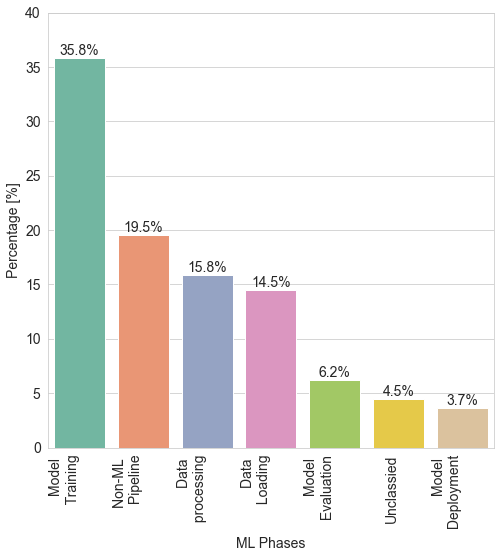

In [305]:
plot_ml_phases_barplot(df_pipeline, 'ml_phases_barplot.pdf')